In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


df = pd.read_csv('bank.csv')
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Exploring the Basics
### Summary:
* Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

* The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

* As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".**

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Fortunately, there are **no missing values**. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [6]:
# No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


C:\Users\yerne\AppData\Local\Temp\ipykernel_30872\3921876597.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



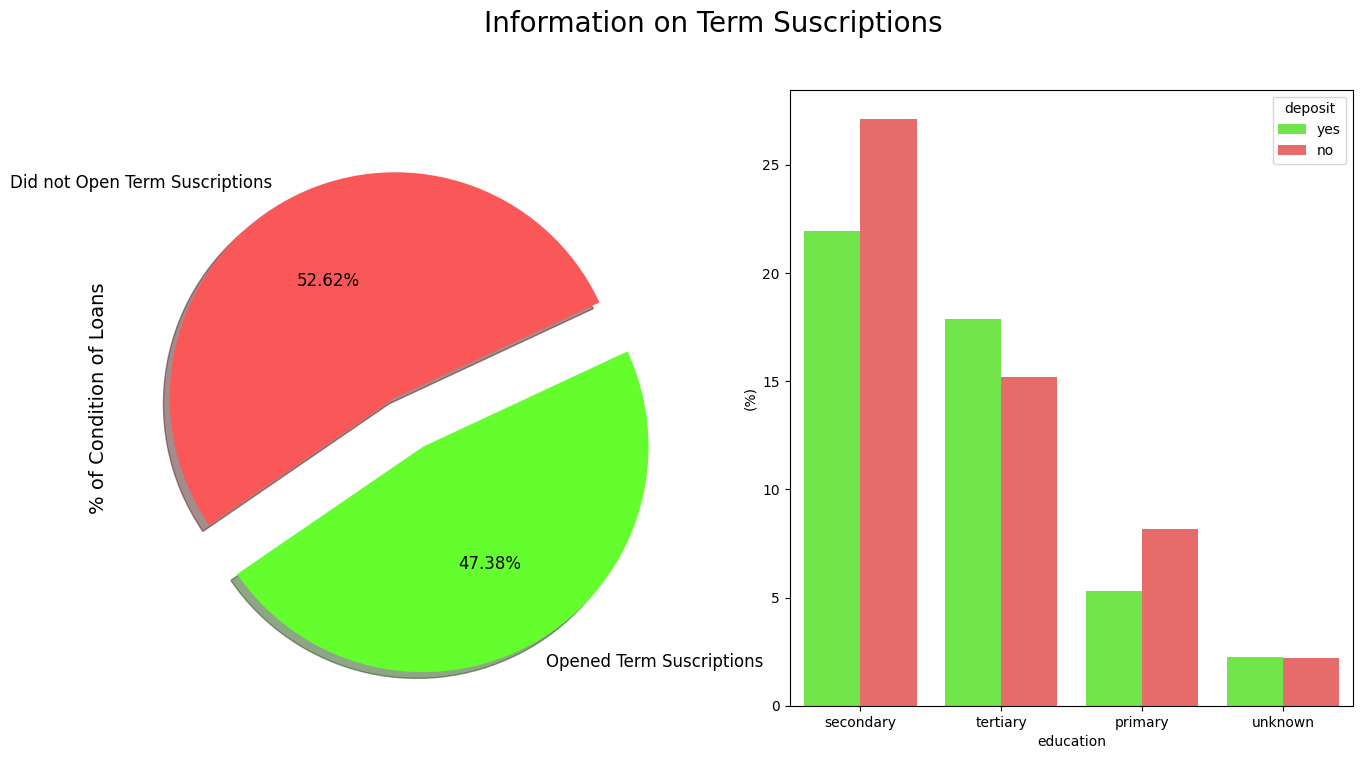

In [7]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [10]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


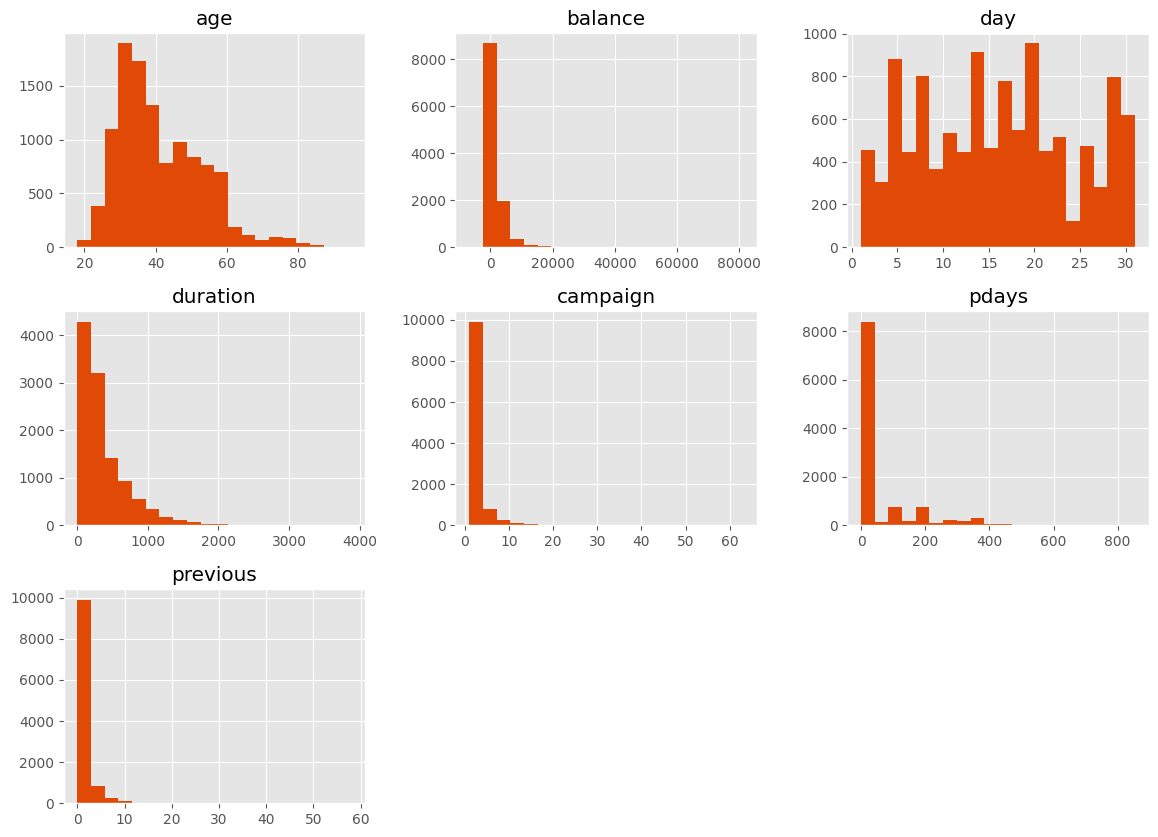

In [11]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('ggplot')


df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [12]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

C:\Users\yerne\AppData\Local\Temp\ipykernel_30872\3455150037.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



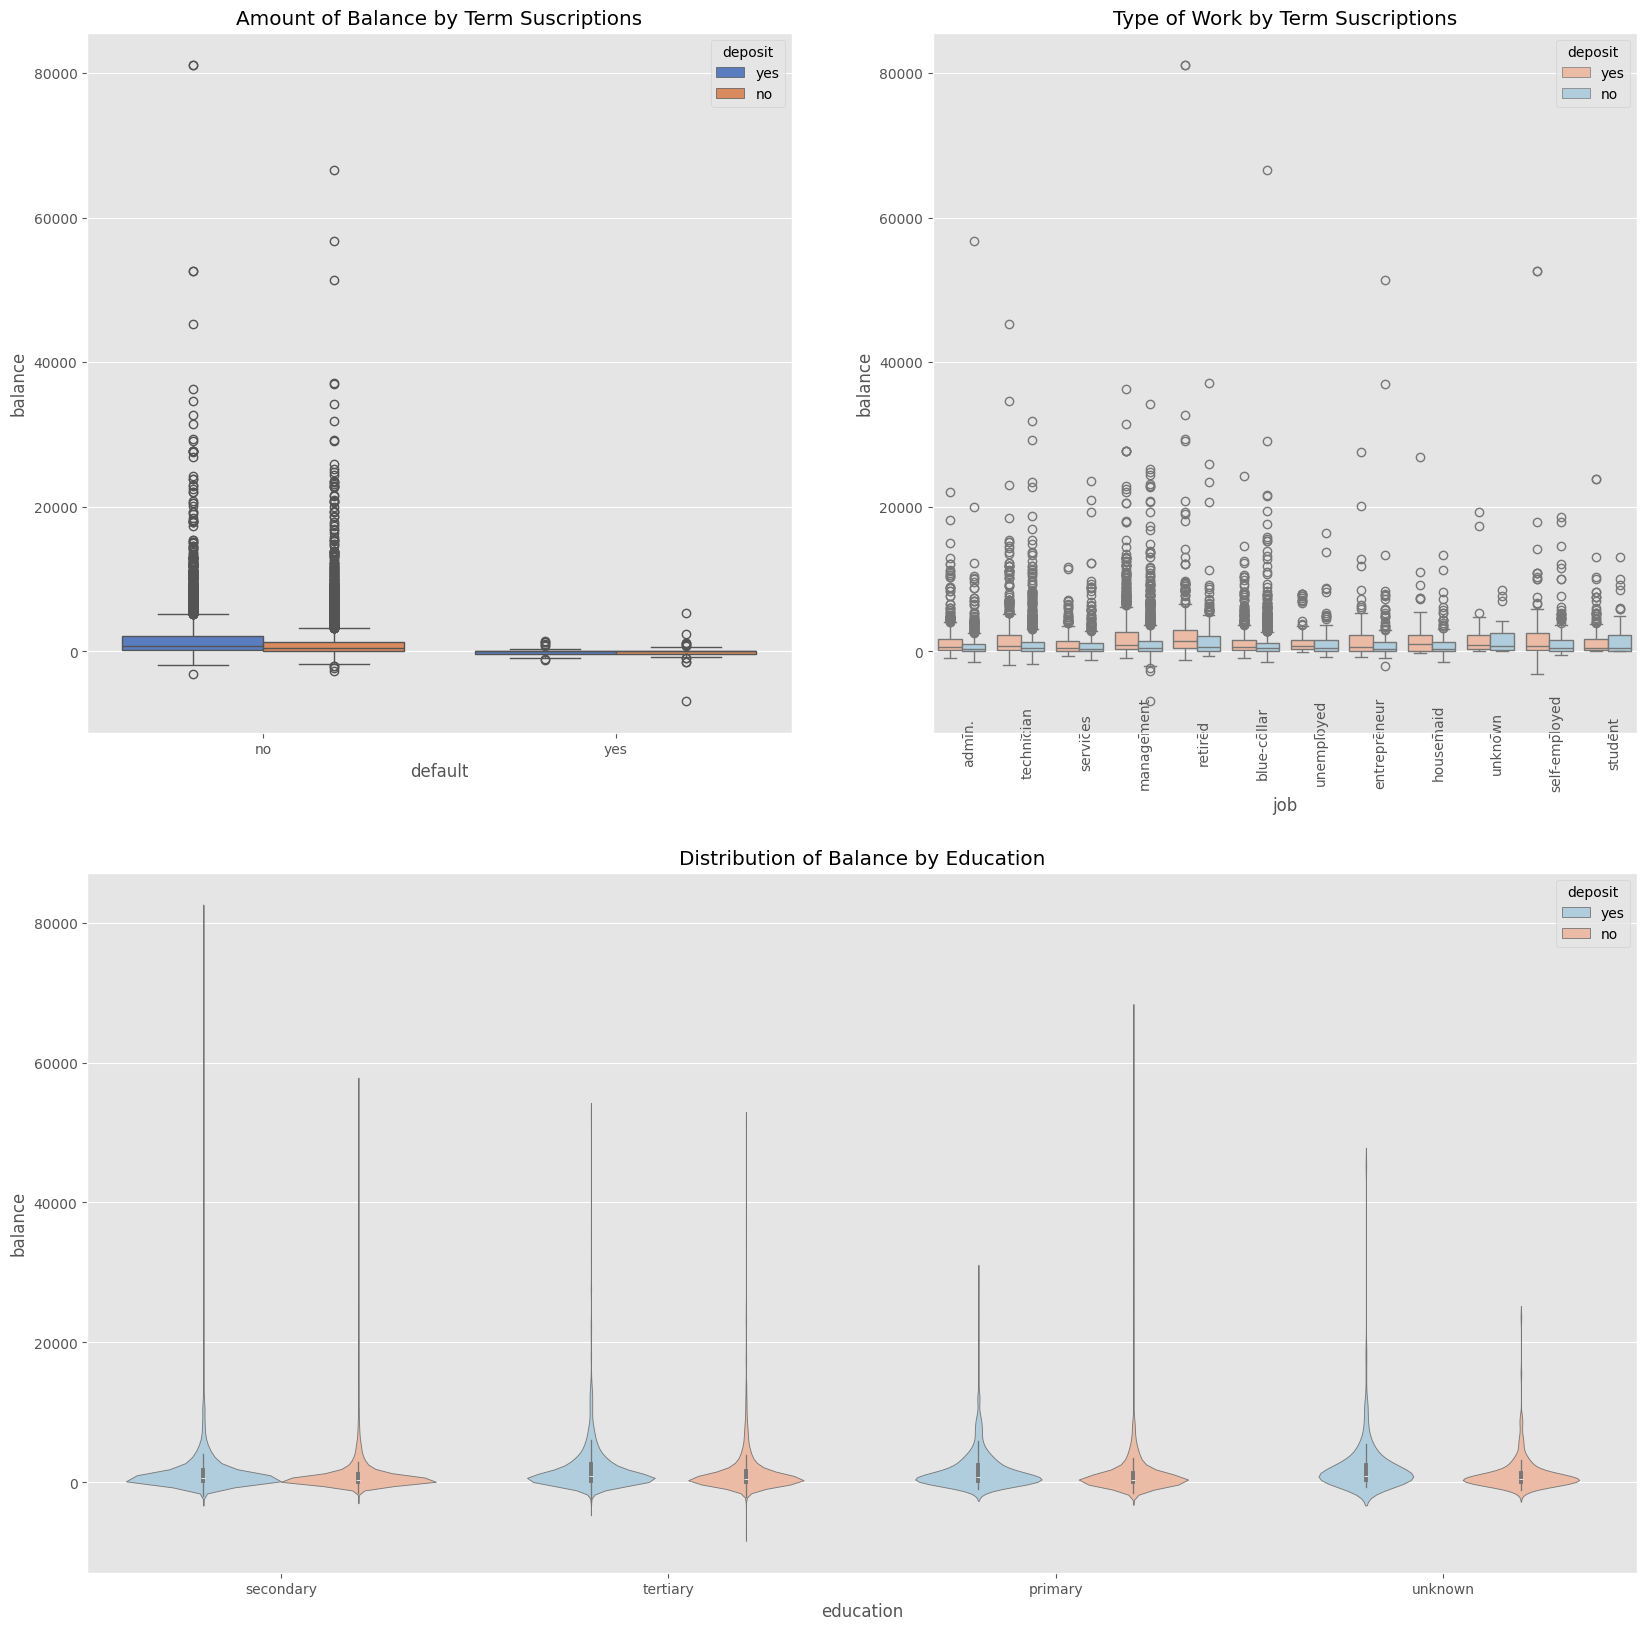

In [13]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Analysis by Occupation:
* Number of Occupations: Management is the occupation that is more prevalent in this dataset.
* Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
* Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

In [15]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [17]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

## Marital Status
Well in this analysis we didn't find any significant insights other than most divorced individuals are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

In [19]:
df['marital'].value_counts()

marital
married     6302
single      3499
divorced    1291
Name: count, dtype: int64

In [20]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
df['marital'].value_counts().tolist()

[6302, 3499, 1291]

In [22]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [23]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\yerne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [25]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [26]:
# Hmmm We have missed some important clients with some high balances. 
# This shouldn't be happening.
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Clustering Marital Status and Education:
* Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.
* Education: The level of education also has a significant impact on the amount of balance a prospect has.
* Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

In [29]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [30]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

C:\Users\yerne\AppData\Local\Temp\ipykernel_30872\2894269200.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'single/primary' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,married/tertiary


C:\Users\yerne\AppData\Local\Temp\ipykernel_30872\3037191660.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

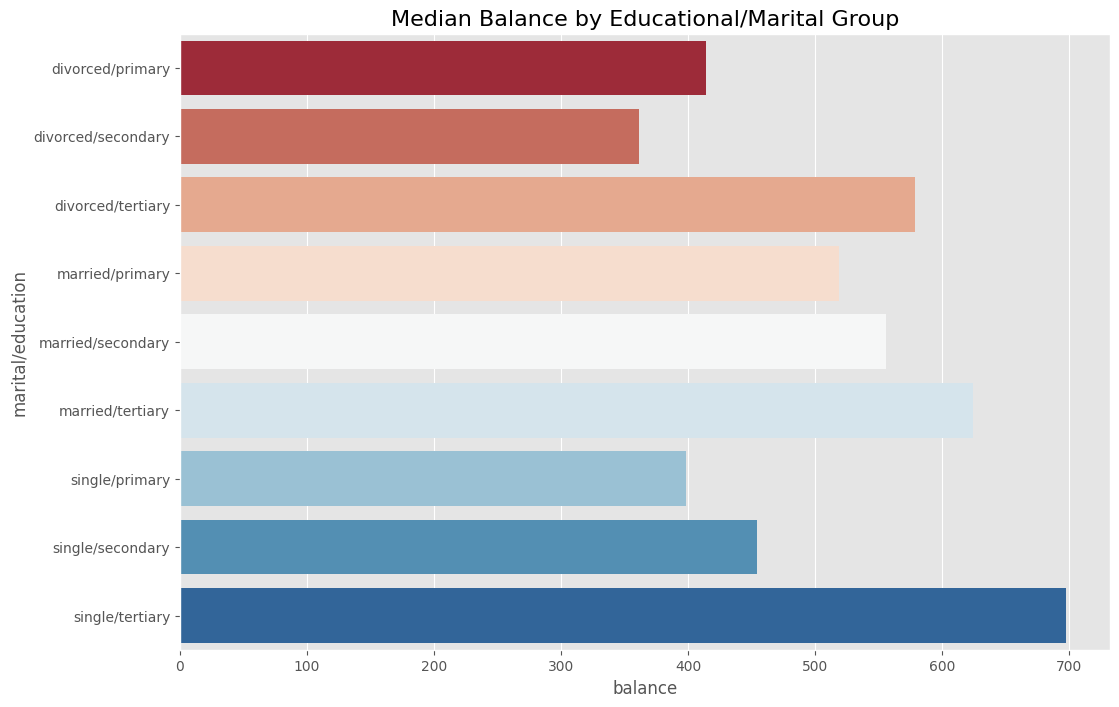

In [31]:
# Grouping by 'marital/education' and calculating the median balance
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Using seaborn's barplot with 'balance' on the x-axis and 'marital/education' on the y-axis,
# while assigning 'marital/education' to 'hue' and setting 'legend=False'
sns.barplot(x="balance", y="marital/education", hue="marital/education", data=education_groups, palette="RdBu", legend=False)

# Setting the title
plt.title('Median Balance by Educational/Marital Group', fontsize=16)

# Showing the plot
plt.show()


In [32]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,married/tertiary


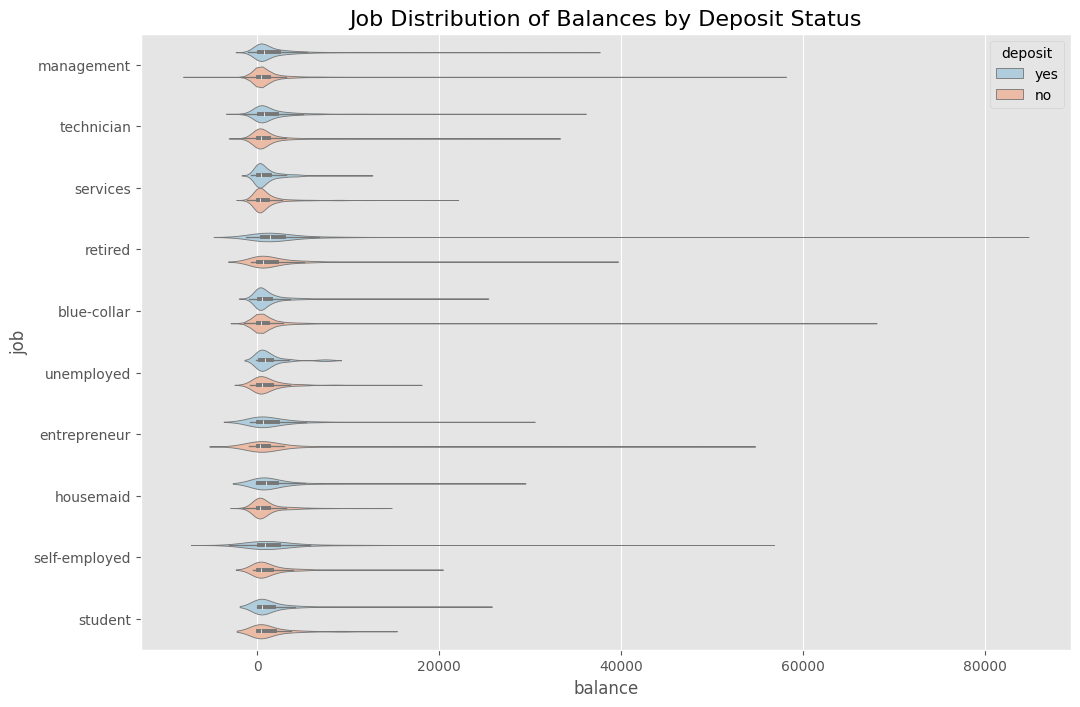

In [34]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

## Campaign Duration:
* **Campaign Duration**: Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
* **Average Campaign Duration**: The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit.
* **Duration Status:** People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

In [35]:
df.drop(['marital/education'], axis=1, inplace=True)

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


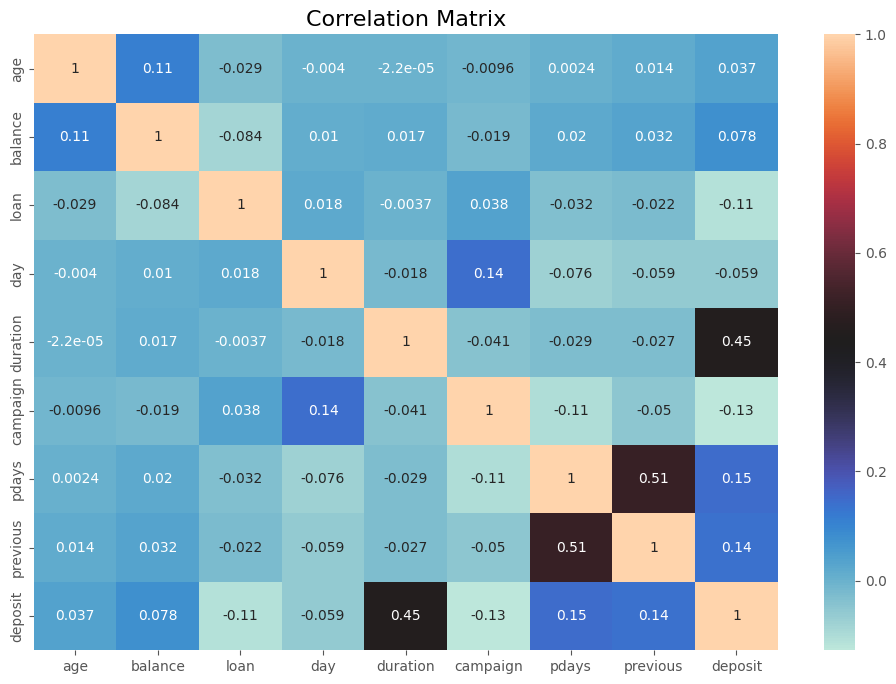

In [37]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])


# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="icefire",annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

C:\Users\yerne\AppData\Local\Temp\ipykernel_30872\1879032717.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'below_average' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



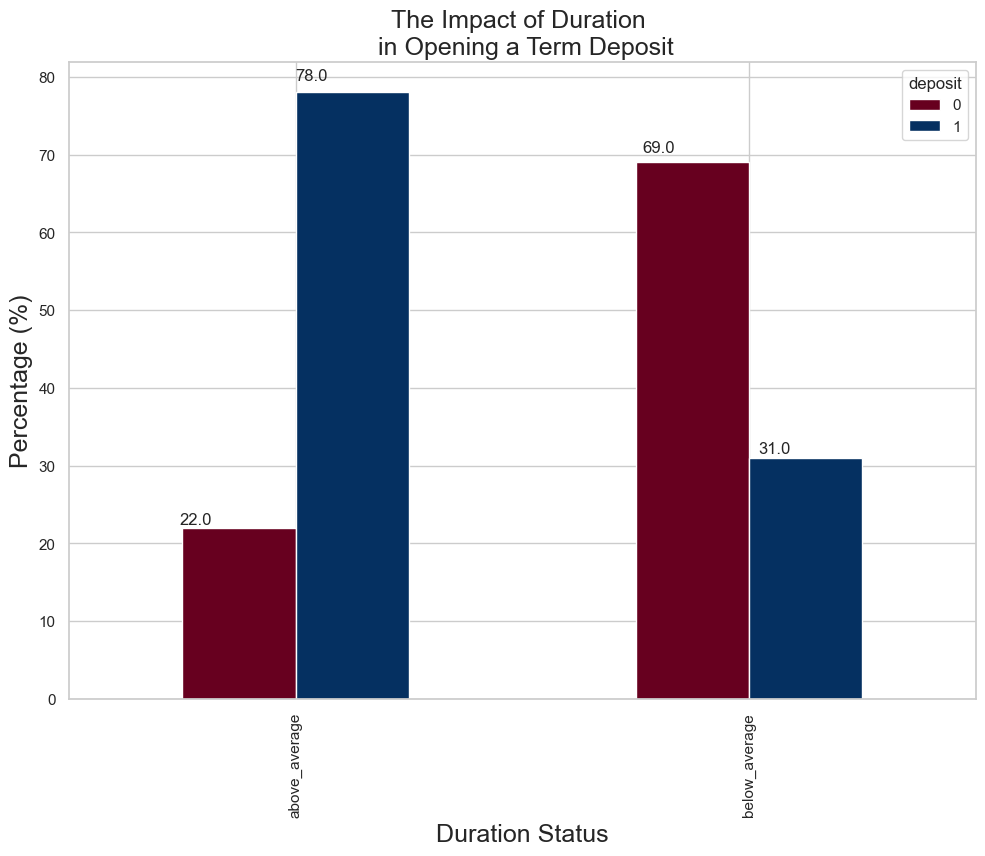

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

## Classification Model:

In [39]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
print(term_deposits["housing"].value_counts()/len(term_deposits))
term_deposits.head()

housing
no     0.526877
yes    0.473123
Name: count, dtype: float64


,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,yes,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,yes,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,yes,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,yes,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,yes,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [40]:
term_deposits["loan"].value_counts()/len(term_deposits)

loan
no     0.869199
yes    0.130801
Name: count, dtype: float64

## Stratified Sampling:
Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this?


Personal Loans:
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?
1) We need to see how our data is distributed.
2) After noticiing that the column of loan contains 87% of "no" (Does not have personal loans) and 13% of "yes" (Have personal loans.)
3) We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes"." Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this?

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
print(f"loan in Train set \n \n {stratified_train['loan'].value_counts()/len(df)}")
print("*"*50)
print(f"loan in test set \n \n {stratified_test['loan'].value_counts()/len(df)}")

loan in Train set 
 
 loan
no     0.729829
yes    0.109836
Name: count, dtype: float64
**************************************************
loan in test set 
 
 loan
no     0.182528
yes    0.027459
Name: count, dtype: float64


In [42]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
print(train_data['deposit'].value_counts())
print(test_data['deposit'].value_counts())

deposit
no     4697
yes    4232
Name: count, dtype: int64
deposit
no     1176
yes    1057
Name: count, dtype: int64


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 9867 to 9672
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    8929 non-null   object
 1   age        8929 non-null   int64 
 2   job        8929 non-null   object
 3   marital    8929 non-null   object
 4   education  8929 non-null   object
 5   default    8929 non-null   object
 6   balance    8929 non-null   int64 
 7   housing    8929 non-null   object
 8   loan       8929 non-null   object
 9   contact    8929 non-null   object
 10  day        8929 non-null   int64 
 11  month      8929 non-null   object
 12  duration   8929 non-null   int64 
 13  campaign   8929 non-null   int64 
 14  pdays      8929 non-null   int64 
 15  previous   8929 non-null   int64 
 16  poutcome   8929 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [44]:
y_train = train_data['deposit']
y_test = test_data['deposit']
x_train= train_data.drop('deposit', axis=1)
x_test= test_data.drop('deposit', axis=1)

In [45]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9867,55,retired,married,secondary,no,6690,no,no,cellular,30,apr,534,1,-1,0,unknown
10647,31,technician,single,secondary,no,433,no,no,cellular,11,aug,1504,2,-1,0,unknown
96,30,technician,single,tertiary,no,880,yes,yes,unknown,19,may,967,6,-1,0,unknown
8334,41,services,married,primary,no,0,yes,no,cellular,17,jul,18,11,-1,0,unknown
6135,39,housemaid,married,primary,no,13338,no,no,cellular,11,aug,103,4,-1,0,unknown


In [46]:
y_train.head()

9867      no
10647     no
96       yes
8334      no
6135      no
Name: deposit, dtype: object

## Standard Scaler

In [47]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["age", "balance", "day", "campaign", "pdays", "previous", "duration"]

scaler = StandardScaler()

x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])

In [48]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9867,1.146439,retired,married,secondary,no,1.687611,no,no,cellular,1.694428,apr,0.467098,-0.559344,-0.481347,-0.368832,unknown
10647,-0.861023,technician,single,secondary,no,-0.350662,no,no,cellular,-0.556006,aug,3.257807,-0.190319,-0.481347,-0.368832,unknown
96,-0.944668,technician,single,tertiary,no,-0.205048,yes,yes,unknown,0.391545,may,1.712848,1.285779,-0.481347,-0.368832,unknown
8334,-0.024581,services,married,primary,no,-0.491716,yes,no,cellular,0.154658,jul,-1.017444,3.130902,-0.481347,-0.368832,unknown
6135,-0.191869,housemaid,married,primary,no,3.853256,no,no,cellular,-0.556006,aug,-0.772897,0.547730,-0.481347,-0.368832,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0.979150,management,married,tertiary,no,0.678084,yes,no,cellular,-1.266669,aug,-0.188862,-0.190319,1.191919,0.518851,other
10071,-0.693735,admin.,married,secondary,no,-0.192017,no,no,cellular,-0.319118,aug,-0.749881,-0.559344,0.493192,0.075009,success
2994,-0.861023,technician,married,secondary,no,-0.268897,yes,no,cellular,-1.029781,dec,0.714522,0.178706,-0.481347,-0.368832,unknown
335,0.226352,services,married,secondary,no,-0.321670,no,yes,unknown,0.509989,jun,1.551735,-0.559344,-0.481347,-0.368832,unknown


In [49]:
numeric_features = ["age", "balance", "day", "campaign", "pdays", "previous", "duration"]

x_test[numeric_features] = scaler.fit_transform(x_test[numeric_features])

In [50]:
x_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9195,-0.424637,blue-collar,married,secondary,no,-0.416591,yes,yes,cellular,1.859516,jul,-0.082231,-0.534066,-0.480531,-0.343614,unknown
4630,0.427308,technician,single,secondary,no,-0.193211,no,no,cellular,0.418663,nov,1.290778,0.188047,-0.480531,-0.343614,unknown
5357,-0.083859,blue-collar,married,secondary,no,-0.397821,yes,no,unknown,1.619374,may,-0.450104,-0.173009,-0.480531,-0.343614,unknown
7329,1.449641,retired,married,secondary,no,-0.509908,yes,no,cellular,-1.022191,may,-0.418241,-0.173009,-0.480531,-0.343614,unknown
2877,-0.339442,management,married,tertiary,no,-0.361340,no,no,cellular,-1.502475,nov,-0.649973,-0.534066,-0.480531,-0.343614,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.256919,blue-collar,single,secondary,no,-0.347065,no,yes,cellular,0.178520,jul,2.258257,0.549103,-0.480531,-0.343614,unknown
8346,-0.424637,technician,married,primary,no,0.012721,yes,yes,unknown,1.379231,may,-0.108300,2.715440,-0.480531,-0.343614,unknown
3716,3.835086,retired,married,primary,no,-0.092492,no,no,telephone,-0.181693,jul,-0.366102,-0.534066,1.184758,0.885360,success
3916,-1.361776,student,single,secondary,no,0.362197,no,no,cellular,-1.622546,sep,1.232845,-0.173009,-0.480531,-0.343614,unknown


In [51]:
import pandas as pd

numeric_features = ['age', 'balance', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']


for feature in categorical_features:
    encoded_values = pd.get_dummies(x_train[feature], prefix=feature)
    x_train = pd.concat([x_train, encoded_values], axis=1)
    x_train.drop(columns=[feature], inplace=True)

In [52]:
x_train

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_1.2206526043349435,day_1.3390964980983286,day_1.457540391861714,day_1.5759842856250992,day_1.6944281793884846,day_1.8128720731518697,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
9867,1.146439,1.687611,0.467098,-0.559344,-0.481347,-0.368832,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
10647,-0.861023,-0.350662,3.257807,-0.190319,-0.481347,-0.368832,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
96,-0.944668,-0.205048,1.712848,1.285779,-0.481347,-0.368832,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8334,-0.024581,-0.491716,-1.017444,3.130902,-0.481347,-0.368832,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6135,-0.191869,3.853256,-0.772897,0.547730,-0.481347,-0.368832,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0.979150,0.678084,-0.188862,-0.190319,1.191919,0.518851,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10071,-0.693735,-0.192017,-0.749881,-0.559344,0.493192,0.075009,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2994,-0.861023,-0.268897,0.714522,0.178706,-0.481347,-0.368832,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
335,0.226352,-0.321670,1.551735,-0.559344,-0.481347,-0.368832,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [53]:
for feature in categorical_features:
    encoded_values = pd.get_dummies(x_test[feature], prefix=feature)
    x_test = pd.concat([x_test, encoded_values], axis=1)
    x_test.drop(columns=[feature], inplace=True)

x_test

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_1.2591602590604976,day_1.3792313552078304,day_1.499302451355163,day_1.6193735475024957,day_1.7394446436498285,day_1.8595157397971611,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
9195,-0.424637,-0.416591,-0.082231,-0.534066,-0.480531,-0.343614,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4630,0.427308,-0.193211,1.290778,0.188047,-0.480531,-0.343614,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5357,-0.083859,-0.397821,-0.450104,-0.173009,-0.480531,-0.343614,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
7329,1.449641,-0.509908,-0.418241,-0.173009,-0.480531,-0.343614,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2877,-0.339442,-0.361340,-0.649973,-0.534066,-0.480531,-0.343614,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.256919,-0.347065,2.258257,0.549103,-0.480531,-0.343614,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
8346,-0.424637,0.012721,-0.108300,2.715440,-0.480531,-0.343614,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3716,3.835086,-0.092492,-0.366102,-0.534066,1.184758,0.885360,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3916,-1.361776,0.362197,1.232845,-0.173009,-0.480531,-0.343614,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [54]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
print(y_train)
y_train_yes

[0 0 1 ... 1 1 0]


array([False, False,  True, ...,  True,  True, False])

In [55]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [56]:
#  Thanks to Ahspinar for the function. 
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [57]:
df_results = batch_classify(x_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

C:\Users\yerne\AppData\Local\Temp\ipykernel_30872\1528460521.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Logistic Regression' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



trained Logistic Regression in 0.07 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 2.64 s
trained Gradient Boosting Classifier in 1.57 s
trained Decision Tree in 0.08 s
trained Random Forest in 0.18 s
trained Neural Net in 6.09 s
trained Naive Bayes in 0.01 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.082285
5                 Random Forest     0.997760       0.179422
2                    Linear SVM     0.880166       2.635566
1             Nearest Neighbors     0.864598       0.008728
3  Gradient Boosting Classifier     0.857543       1.565135
6                    Neural Net     0.853399       6.093415
0           Logistic Regression     0.835816       0.071627
7                   Naive Bayes     0.719341       0.010573


## Avoiding Overfitting:
Brief Description of Overfitting?

This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awsome score in the training set but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term deposit or not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores.


How can we avoid Overfitting?

The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # زيادة عدد التكرارات القصوى
log_scores = cross_val_score(log_reg, x_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, x_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(max_iter=1000)  # زيادة عدد التكرارات القصوى
neural_scores = cross_val_score(neural_clf, x_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naive Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, x_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naive Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d) 
print(result_df)

         Classifiers  Crossval Mean Scores
0      Logistic Reg.              0.827977
1                SVC              0.847015
2                KNN              0.803450
3           Dec Tree              0.781387
4         Grad B CLF              0.843096
5            Rand FC              0.839623
6  Neural Classifier              0.815769
7        Naive Bayes              0.714637


In [ ]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

## Insights of a Confusion Matrix:

The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.


**Positive/Negative:** Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


**True Negatives (Top-Left Square):** This is the number of correctly classifications of the "No" class or potenial clients that are not willing to suscribe a term deposit.


**False Negatives (Top-Right Square):** This is the number of incorrectly classifications of the "No" class or potential clients that are not willing to suscribe a term depositt.


**False Positives (Bottom-Left Square):** This is the number of incorrectly classifications of the "Yes" class or potential clients that are willing to suscribe a term deposit.


**True Positives (Bottom-Right Square):** This is the number of correctly classifications of the "Yes" class or potenial clients that are willing to suscribe a term deposit.

In [59]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, x_train, y_train, cv=3)

In [60]:
from sklearn.metrics import accuracy_score
grad_clf.fit(x_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.84


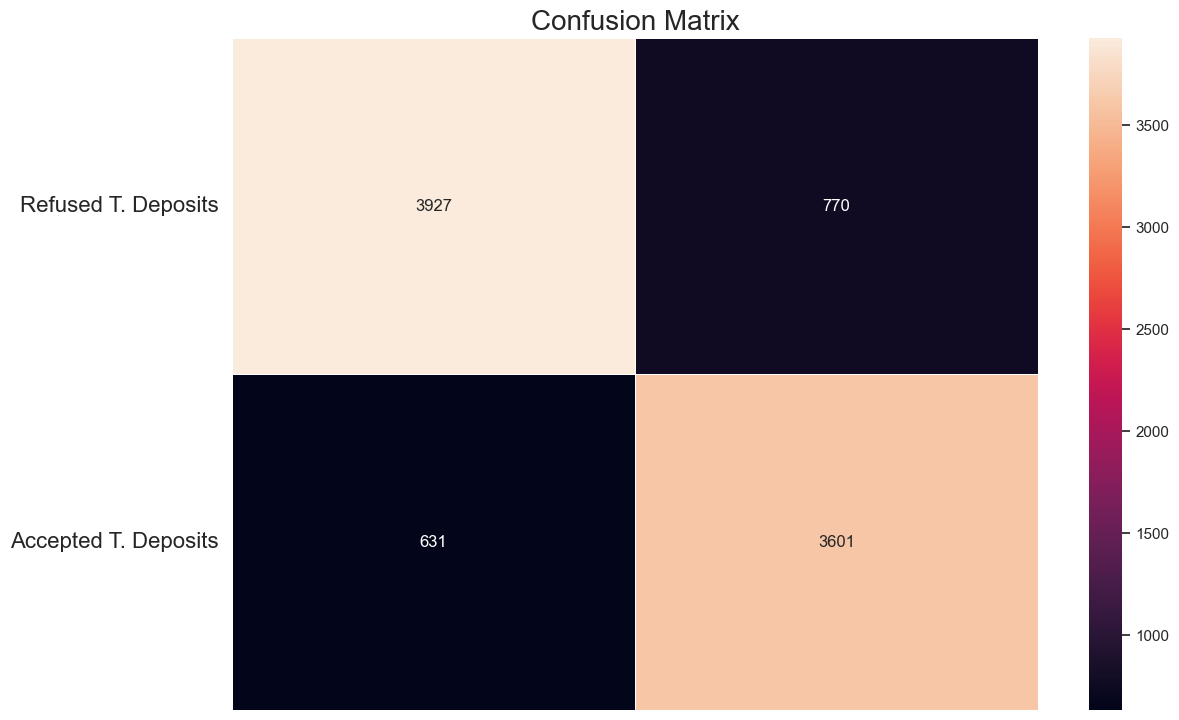

In [61]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

## Precision and Recall:
**Recall:** Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.

**Precision:** Means how sure is the prediction of our model that the actual label is a "Yes".

## Recall Precision Tradeoff:
As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a **"No."** However, that instance was actually a **"Yes"** (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a **"Yes"**!

In [62]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.8238389384580188
Recall Score:  0.850897920604915


In [63]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.8371498314541439

In [64]:
y_scores = cross_val_predict(grad_clf, x_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, x_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, x_train, y_train, cv=3, method="predict_proba")

In [ ]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [65]:
y_scores.shape

(8929,)

In [66]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

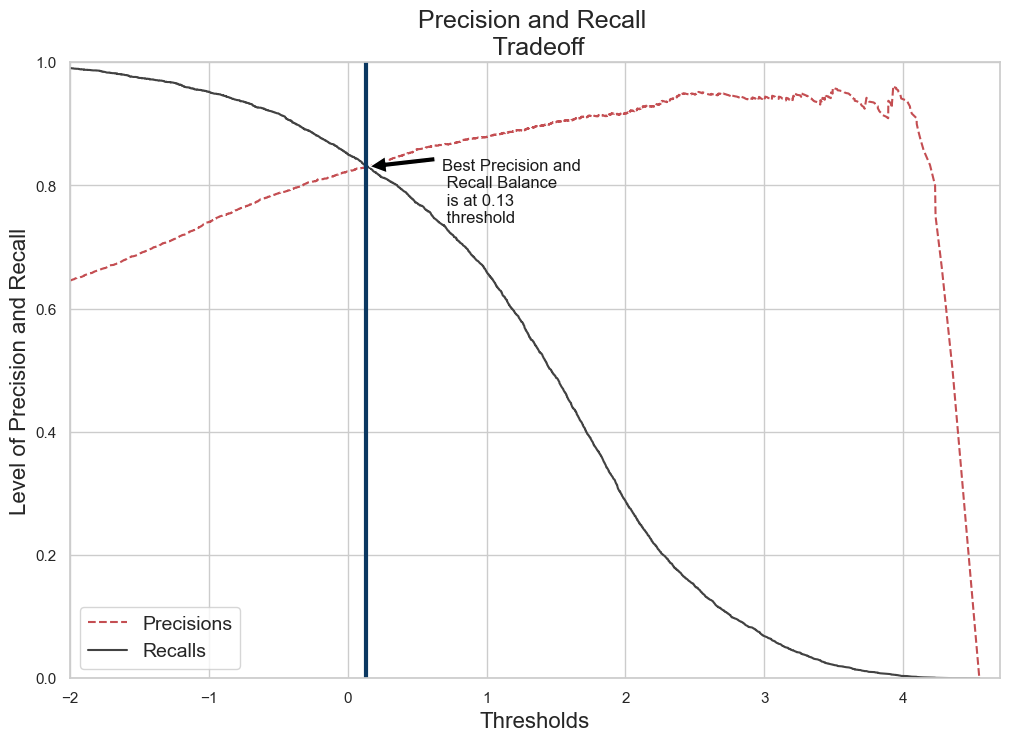

In [67]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

## ROC Curve (Receiver Operating Characteristic):
The **ROC curve** tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

In [72]:
from sklearn.metrics import roc_curve

# Assuming y_train contains two columns and you want to use the first column for roc_curve
# If neural_y_scores is already a 1D array, you don't need to modify it
# neural_y_scores = neural_y_scores[:, 0]  # Commented out because not needed

# Now, use roc_curve with the original y_scores
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)


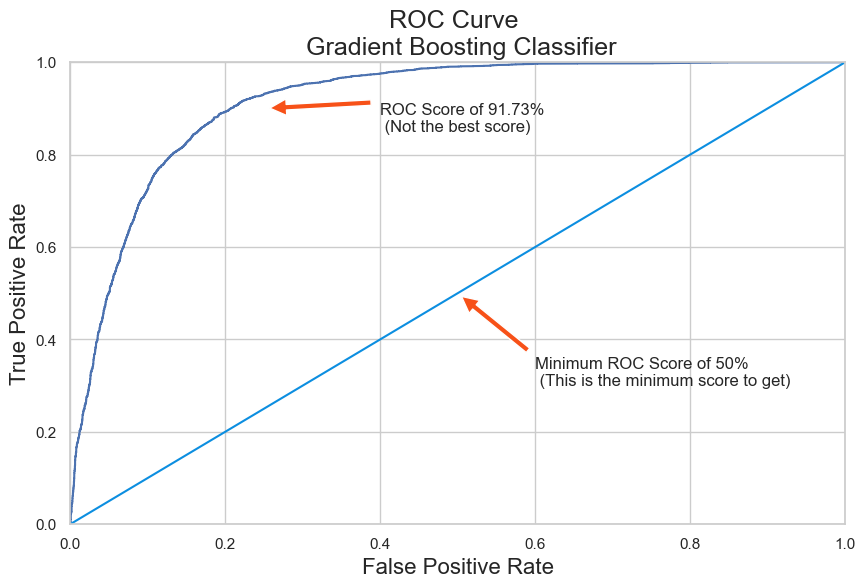

In [73]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score

#naives_y_scores = naives_y_scores[:, 1]

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9152004929744402
Neural Classifier Score:  0.11122154751876774
Naives Bayes Classifier:  0.787333637727979


In [81]:
from sklearn.metrics import roc_curve

# Assuming you have defined y_train and naives_y_scores appropriately

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for Naives Bayes Classifier
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)


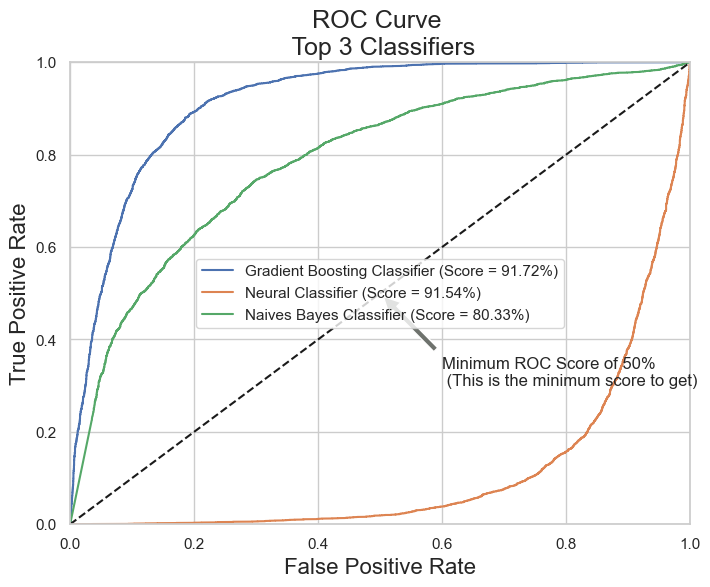

In [82]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

## GradientBoosting Classifier Wins!

Gradient Boosting classifier is the best model to predict whether or not a potential client will suscribe to a term deposit or not. 84% accuracy!

In [83]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier
# grad_clf (Gradient Boosting Classifier) و nav_clf (Naive Bayes Classifier) و neural_clf (Neural Network Classifier). voting='soft' 
voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],
    voting='soft'
)

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('nav', GaussianNB()),
                             ('neural', MLPClassifier(max_iter=1000))],
                 voting='soft')

## Solutions for the Next Marketing Campaign (Conclusion):
1) **Months of Marketing Activity:** We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) **Seasonality:** Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) **Campaign Calls:** A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

4) **Age Category:** The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

5) **Occupation:** Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) **House Loans and Balances:** Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.


7) **Develop a Questionaire during the Calls:** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.


8) **Target individuals with a higher duration (above 375):** Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.


By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.